
# 🏀 NBA Real-Time Győzelmi Esély Predikció

Ez a notebook egy egyszerű példát mutat be arra, hogyan lehet NBA meccs alatt, valós időben megbecsülni egy csapat győzelmi esélyét statisztikai adatok alapján.

A modell figyelembe veszi:
- aktuális pontállást,
- hátralévő játékidőt,
- támadások sebességét (pace),
- dobószázalékot,
- és a történelmi győzelmi valószínűségeket hasonló szituációban.

Az adatok szimuláltak egy példameccshez.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:

# Állítsunk be egy szimulált állást a 3. negyed végén
game_state = {
    'home_score': 89,
    'away_score': 91,
    'quarter': 3,
    'time_remaining_minutes': 12,
    'possessions_remaining': 20,  # becslés: kb. 10-12 percre jellemző
    'home_efficiency': 1.12,  # pont per támadás
    'away_efficiency': 1.08,
    'home_win_prob_baseline': 0.50
}


In [11]:

# Előrejelzett további pontok
home_future_points = game_state['possessions_remaining'] / 2 * game_state['home_efficiency']
away_future_points = game_state['possessions_remaining'] / 2 * game_state['away_efficiency']

# Várható végeredmény
expected_home_final = game_state['home_score'] + home_future_points
expected_away_final = game_state['away_score'] + away_future_points

print(f"Várható végeredmény: Hazai {expected_home_final:.1f} - Vendég {expected_away_final:.1f}")


Várható végeredmény: Hazai 100.2 - Vendég 101.8


In [12]:

# Egyszerű normalCDF-alapú győzelmi esélymodell (z-score alapján)
from scipy.stats import norm

point_diff = expected_home_final - expected_away_final
std_dev = 10  # egyszerűsített szórásbecslés

z = point_diff / std_dev
home_win_prob = norm.cdf(z)

print(f"Győzelmi esély hazai csapatnak: {home_win_prob*100:.1f}%")
print(f"Győzelmi esély vendég csapatnak: {(1 - home_win_prob)*100:.1f}%")


Győzelmi esély hazai csapatnak: 43.6%
Győzelmi esély vendég csapatnak: 56.4%


C:\Users\Adam\AppData\Local\Temp\ipykernel_24744\1463605822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=probs, palette='coolwarm')


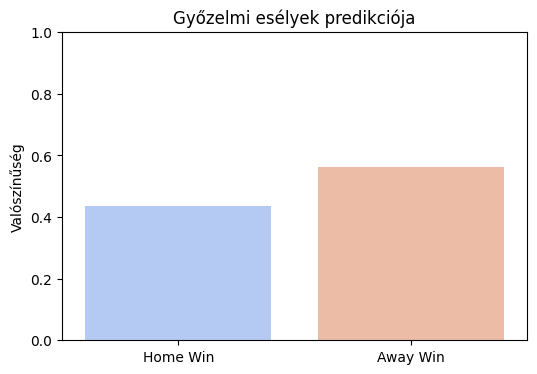

In [13]:

# Vizualizáció
labels = ['Home Win', 'Away Win']
probs = [home_win_prob, 1 - home_win_prob]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=probs, palette='coolwarm')
plt.ylim(0, 1)
plt.title('Győzelmi esélyek predikciója')
plt.ylabel('Valószínűség')
plt.show()
